In [37]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime

# Import the file 
Disney_df = pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Disney-Stock-Data\Resources\DisneyHistoricalStockPriceData.csv")

Robinhood_df = pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Disney-Stock-Data\Resources\Disney Robinhood Data.csv")

Robinhood_df["timestamp"].astype(str)

Robinhood_df['Time']=""

Robinhood_df[['Date','Time']] = Robinhood_df.timestamp.str.split(" ",expand=True)

Robinhood_df[['Month','Day','Year']]=Robinhood_df.Date.str.split("/",expand=True)

Robinhood_df.head()

,timestamp,users_holding,Time,Date,Month,Day,Year
0,5/2/2018 4:56,59936,4:56,5/2/2018,5,2,2018
1,5/2/2018 6:41,59936,6:41,5/2/2018,5,2,2018
2,5/3/2018 0:38,59950,0:38,5/3/2018,5,3,2018
3,5/3/2018 6:36,59950,6:36,5/3/2018,5,3,2018
4,5/3/2018 6:51,59950,6:51,5/3/2018,5,3,2018


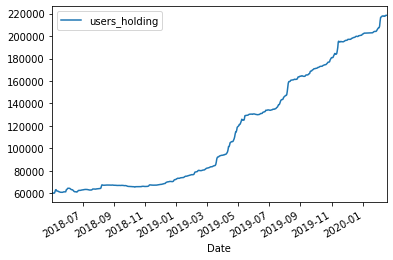

In [40]:
# Change the date column to datetime in order to have harmony with the disney stock price data
Robinhood_df['Date']=pd.to_datetime(Robinhood_df['Date'])

# In order to work with less rows and get one data point for each day, we can groupby the date
# Less rows = less parsing = less processing = increased efficiency


Robinhood_grouped=Robinhood_df.groupby(['Date']).mean()



In [43]:
# CLEANING THE DISNEY STOCK DATA
# Pass in a list to name the header
Disney_df.columns = ["date","open","high","low","close","volume"]

# Delete the previous row by deleting rows with the word "open"
Disney_cleaned = Disney_df[Disney_df["open"] != "Open"]


# Pulling just the dates along with the close 
Disney_cleaned_short = Disney_cleaned[["date","close"]]
Disney_cleaned_short.rename(index=int)

Disney_cleaned_short['close']=pd.to_numeric(Disney_cleaned_short['close'])
Disney_cleaned_short['date']=pd.to_datetime(Disney_cleaned_short['date'])

Disney_cleaned_short.plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002365E85F3A8> (for post_execute):


ValueError: view limit minimum -36879.353500000005 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [4]:
# Import a column that shows the change between the open and close price for the day

# Pass in the columns to be subtracted as integers with pandas
Disney_cleaned["Change"] = pd.to_numeric(Disney_cleaned["open"]) - pd.to_numeric(Disney_cleaned["close"])

# Change date column to datetime so data is uniform
# Disney_cleaned['date']=pd.to_datetime(Disney_cleaned['date'])

# Change datetime in shortened disney dataframe
# Disney_cleaned_short['date']=pd.to_datetime(Disney_cleaned_short['date'])

Disney_cleaned_short_final = Disney_cleaned_short[:-11900]
Disney_cleaned_final = Disney_cleaned[:-11900]
try:
    Disney_cleaned_final.values.astype(int)
except ValueError:
    pass
Disney_cleaned_final.dtypes

date       object
open       object
high       object
low        object
close      object
volume     object
Change    float64
dtype: object